# Fixed-point iteration

```{admonition} Definition
For a function $g$, The point $x_0$ is called a fixed point if
\begin{align*}
g(x_0) = x_0
\end{align*}
```

<font color='Blue'><b>Example</b></font>: For example $x_0 = 2$ is a fixed point for $g(x) = x^2 -2$.

<center>
<iframe src="https://www.desmos.com/calculator/qvopinxksg?embed" width="500" height="500" style="border: 1px solid #ccc" frameborder=0></iframe>
</center>

```{admonition} Theorem

If function $g$ is continious on $[a,b]$, and $g(x) \in [a, b]$ for all $x$ values from $[a, b]$. In addition, if $g'(x)$ exists on $(a, b)$ and $|g'(x)| \leq k$ for all $x$ values from $[a, b]$ and some value of $0<k<1$. Then, the sequence generated by $x_n = g(x_{n-1})$ converges to a unique **fixed point** in $[a, b]$.

```

Assume that $f(x)$ is a real function on a real values domain $[a,b]$. Then, given $x_{0} \in [a,b]$, the fixed point iteration is

\begin{align*}
x_{n+1}=f(x_{n}),\,n=0,1,2,\dots.
\end{align*}

This algorithm generates a sequence $\{x_{0},x_{1},x_{2},\dots\}$. This algorithm is also known as **function iteration**.

::::{tab-set}

:::{tab-item} Python Code
```python
import pandas as pd 
import numpy as np

def Fixed_Point(g, x0, TOL, Nmax):
    '''
    Parameters
    ----------
    g : function 
        DESCRIPTION. A function. Here we use lambda functions
    a : float
        DESCRIPTION. a is the left side of interval [a, b]
    b : float
        DESCRIPTION. b is the right side of interval [a, b]
    Nmax : Int, optional
        DESCRIPTION. Maximum number of iterations. The default is 1000.
    TOL : float, optional
        DESCRIPTION. Tolerance (epsilon). The default is 1e-4.

    Returns
    -------
    a dataframe
    '''
    
    xn = np.zeros(Nmax, dtype=float)
    En = np.zeros(Nmax, dtype=float)
    xn[0] = x0
    En[0] = x0
    
    for n in range(0, Nmax-1):
        xn[n+1] = g(xn[n])
        En[n+1] = np.abs(xn[n+1]-xn[n])
        if En[n+1] < TOL:
            return pd.DataFrame({'xn': xn[0:n+2], 'En': En[0:n+2]})
    return None
```
:::

:::{tab-item} MATLAB Code
```MATLAB
function [xn, En] = Fixed_Point(g, x0, TOL, Nmax)
%{
Parameters
----------
g : function 
    DESCRIPTION. A function. Here we use lambda functions
a : float
    DESCRIPTION. a is the left side of interval (a, b)
b : float
    DESCRIPTION. b is the right side of interval (a, b)
Nmax : Int, optional
    DESCRIPTION. Maximum number of iterations. The default is 1000.
TOL : float, optional
    DESCRIPTION. Tolerance (epsilon). The default is 1e-4.

Returns
-------
xn, En

Example: g = @(x) sqrt(x)
%}

switch nargin
    case 3
        Nmax = 1000;
    case 2
        TOL = 1e-4; Nmax = 1000;
end

xn = zeros(Nmax, 1);
En = zeros(Nmax, 1);

% initial values
xn(1) = x0;
En(1) = x0;

for n = 1:(Nmax-1)
    xn(n+1) = g(xn(n));
    En(n+1) = abs(xn(n+1)-xn(n));
    if En(n+1) < TOL
        xn = xn(1:n+1);
        En = En(1:n+1);
        return
    end
end
```
:::

::::

<font color='Blue'><b>Example</b></font>: Find a root of the following polynomial.

\begin{align*}
f(x)=x - \sqrt{x}.
\end{align*}

<font color='Green'><b>Solution</b></font>: First, we need to convert $f(x) = 0$ into the form $x = g(x)$. That is

\begin{align*}
g(x)=\sqrt{x}.
\end{align*}
Then

In [1]:
# This part is used for producing tables and figures
import sys
sys.path.insert(0,'..')
import hd_tools as hd

Loading BokehJS ...

In [2]:
import numpy as np
g = lambda x : np.sqrt(x)
from hd_RootFinding_Algorithms import Fixed_Point
data = Fixed_Point(g = g, x0 = .5, TOL=1e-4, Nmax=20)
display(data.style.format({'En': "{:.4e}"}))

,xn,En
0,0.500000,5.0000e-01
1,0.707107,2.0711e-01
2,0.840896,1.3379e-01
3,0.917004,7.6108e-02
4,0.957603,4.0599e-02
5,0.978572,2.0969e-02
6,0.989228,1.0656e-02
7,0.994599,5.3714e-03
8,0.997296,2.6966e-03
9,0.998647,1.3511e-03


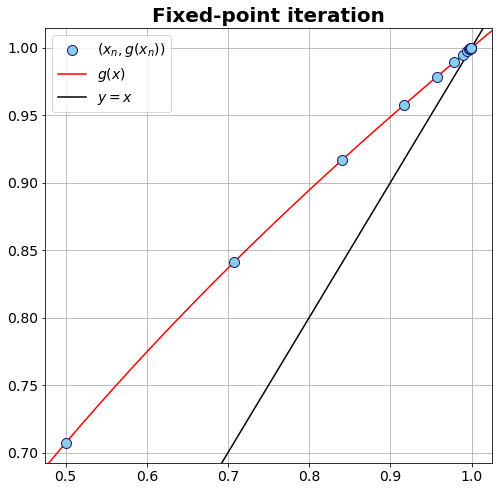

In [3]:
import matplotlib.pyplot as plt

fontsize = 14
Fig_Params = ['legend.fontsize','axes.labelsize','axes.titlesize','xtick.labelsize','ytick.labelsize']
Fig_Params = dict(zip(Fig_Params, len(Fig_Params)*[fontsize]))
plt.rcParams.update(Fig_Params)
    
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
_ = ax.scatter(data.xn, g(data.xn), s= 100, facecolors='SkyBlue',
               edgecolors='MidnightBlue', label = r'$(x_{n}, g(x_{n}))$', zorder = 3)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1])
y = g(x)
_ = ax.plot(x, g(x), 'r', label = r'$g(x)$')
_ = ax.plot(x, x, 'k', label = r'$y = x$')
_ = ax.legend()
_ = ax.set_xlim(xlim)
_ = ax.set_ylim(ylim)
_ = ax.yaxis.grid()
_ = ax.xaxis.grid(True, which='major')
_ = ax.set_title('Fixed-point iteration', fontsize = 20, weight = 'bold')

<font color='Blue'><b>Example</b></font>: Find a root of the following polynomial.

\begin{align*}
f(x)=x^{3}-x-2.
\end{align*}

<font color='Green'><b>Solution</b></font>: First, we need to convert $f(x) = 0$ into the form $x = g(x)$. That is

\begin{align*}
g(x)=x^{3}-2.
\end{align*}
Then

In [4]:
g = lambda x : (x + 2)**(1/3)
data = Fixed_Point(g = g, x0 = .5, TOL=1e-4, Nmax=20)
display(data.style.format({'En': "{:.4e}"}))

,xn,En
0,0.500000,5.0000e-01
1,1.357209,8.5721e-01
2,1.497360,1.4015e-01
3,1.517913,2.0553e-02
4,1.520880,2.9676e-03
5,1.521308,4.2754e-04
6,1.521369,6.1575e-05


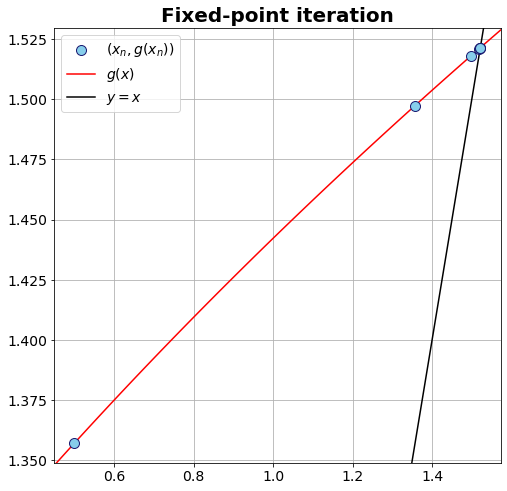

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
_ = ax.scatter(data.xn, g(data.xn), s= 100, facecolors='SkyBlue',
               edgecolors='MidnightBlue', label = r'$(x_{n}, g(x_{n}))$', zorder = 3)
xlim = ax.get_xlim()
ylim = ax.get_ylim()
x = np.linspace(xlim[0], xlim[1])
y = g(x)
_ = ax.plot(x, g(x), 'r', label = r'$g(x)$')
_ = ax.plot(x, x, 'k', label = r'$y = x$')
_ = ax.legend()
_ = ax.set_xlim(xlim)
_ = ax.set_ylim(ylim)
_ = ax.yaxis.grid()
_ = ax.xaxis.grid(True, which='major')
_ = ax.set_title('Fixed-point iteration', fontsize = 20, weight = 'bold')

***
**References:**
1. Burden, Richard L., and J. Douglas Faires. "Numerical analysis 8th ed." Thomson Brooks/Cole (2005).
1. Atkinson, Kendall E. An introduction to numerical analysis. John wiley & sons, 2008.
1. [Fixed-point iteration Wikipedia page](https://en.wikipedia.org/wiki/Fixed-point_iteration)
***